# Contexto de Negócio
Uma empresa de Reflorestamento quer mapear as Unidades de Conservação existente em cada esfera administrativa e em cada estado, levando em consideração quantidade, área total e área específica. 

# Desafio
- quantas unidades não possuem plano de manejo?
Vamos supor que você foi contratada pela empresa Netflix e ela deseja um modelo preditivo para prever as notas de filmes, para assim decidir se vale a pena ou não colocar esse filme no catálogo. Você daria conta desse desafio?

# Produtos finais:
Um mapa que mostra os estados com a maior área. 

## 0.0. Step 00 - Data Presentation

### 0.1. Bibliotecas

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### 0.2. Funções

### 0.3. Carregamento dos Dados

In [2]:
url = 'http://dados.mma.gov.br/dataset/44b6dc8a-dc82-4a84-8d95-1b0da7c85dac/resource/3562d093-14ed-434b-9fa3-411b664d6836/download/unidade-de-conservacao.csv'

data = pd.read_csv(url, sep=';', error_bad_lines=False)
data.head()

,Código UC,Nome da UC,Esfera Administrativa,Categoria de Manejo,Categoria IUCN,UF,Ano de criação,Ato Legal de Criação,Outros atos legais,Municípios Abrangidos,Plano de Manejo,Conselho Gestor,Área (ha),Área (ha) Amazônia,Área (ha) Caatinga,Área (ha) Cerrado,Área (ha) Mata Atlântica,Área (ha) Pampa,Área (ha) Pantanal,Área (ha) Área Marinha
0,0000.00.0001,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Decreto 528 de 20/05/1992,-,Governador Celso Ramos (SC),Não,Sim,4.437,0,0,0,4.320,0.0,0.0,117
1,0000.00.0002,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Decreto 98182 de 26/09/1989,-,"Bonito de Minas (MG), Cônego Marinho (MG), Ita...",Não,Sim,143.354,0,4.614,138.741,0,0.0,0.0,0
2,0000.00.0003,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO DES...,Federal,Área de Proteção Ambiental,Category V,"DF, GO",1983,Decreto 88940 de 07/11/1983,-,"Brasília (DF), Padre Bernardo (GO), Águas Lind...",Não,Não,41.784,0,0,41.784,0,0.0,0.0,0
3,0000.00.0004,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Federal,Área de Proteção Ambiental,Category V,DF,1983,Decreto 88940 de 07/11/1983,-,Brasília (DF),Não,Não,82.680,0,0,82.680,0,0.0,0.0,0
4,0000.00.0005,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Federal,Área de Proteção Ambiental,Category V,RJ,2002,Decreto S/N de 27/06/2002,-,"Silva Jardim (RJ), Rio das Ostras (RJ), Rio Bo...",Sim,Sim,150.374,0,0,0,150.341,0.0,0.0,32


## 1.0. Step 01 - Data Description

In [3]:
# copiar os dados para torná-los recuperaveis mais tarde

### 1.1. Data Dimensions

- .shape, len

In [4]:
print(f'Quantidade de linhas: {data.shape[0]}\n'
      f'Quantidade de colunas: {data.shape[1]}')

Quantidade de linhas: 2201
Quantidade de colunas: 20


### 1.2. Data Information

data.dtypes*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Código UC                 2201 non-null   object 
 1   Nome da UC                2201 non-null   object 
 2   Esfera Administrativa     2201 non-null   object 
 3   Categoria de Manejo       2201 non-null   object 
 4   Categoria IUCN            2201 non-null   object 
 5   UF                        2201 non-null   object 
 6   Ano de criação            2201 non-null   int64  
 7   Ato Legal de Criação      2201 non-null   object 
 8   Outros atos legais        2201 non-null   object 
 9   Municípios Abrangidos     2201 non-null   object 
 10  Plano de Manejo           2201 non-null   object 
 11  Conselho Gestor           2201 non-null   object 
 12  Área (ha)                 2201 non-null   object 
 13  Área (ha) Amazônia        2201 non-null   object 
 14  Área (ha

In [6]:
data.describe()

,Ano de criação,Área (ha) Pampa,Área (ha) Pantanal
count,2201.000000,2201.000000,2201.000000
mean,2000.209450,1.713058,1.500432
std,11.732907,32.354632,29.706676
min,1934.000000,0.000000,0.000000
25%,1995.000000,0.000000,0.000000
50%,2001.000000,0.000000,0.000000
75%,2009.000000,0.000000,0.000000
max,2018.000000,959.000000,951.000000


### 1.3. Checking NA

data.isna().sum()

In [7]:
data.isna().sum()

Código UC                   0
Nome da UC                  0
Esfera Administrativa       0
Categoria de Manejo         0
Categoria IUCN              0
UF                          0
Ano de criação              0
Ato Legal de Criação        0
Outros atos legais          0
Municípios Abrangidos       0
Plano de Manejo             0
Conselho Gestor             0
Área (ha)                   0
Área (ha) Amazônia          0
Área (ha) Caatinga          0
Área (ha) Cerrado           0
Área (ha) Mata Atlântica    0
Área (ha) Pampa             0
Área (ha) Pantanal          0
Área (ha) Área Marinha      0
dtype: int64

### 1.4. Data Cleaning

#### 1.4.1. Cleaning columns

In [8]:
data.drop(['Código UC', 'Ato Legal de Criação', 'Outros atos legais', 'Municípios Abrangidos'], axis=1, inplace=True)

In [9]:
data.head()

,Nome da UC,Esfera Administrativa,Categoria de Manejo,Categoria IUCN,UF,Ano de criação,Plano de Manejo,Conselho Gestor,Área (ha),Área (ha) Amazônia,Área (ha) Caatinga,Área (ha) Cerrado,Área (ha) Mata Atlântica,Área (ha) Pampa,Área (ha) Pantanal,Área (ha) Área Marinha
0,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Não,Sim,4.437,0,0,0,4.320,0.0,0.0,117
1,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Não,Sim,143.354,0,4.614,138.741,0,0.0,0.0,0
2,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO DES...,Federal,Área de Proteção Ambiental,Category V,"DF, GO",1983,Não,Não,41.784,0,0,41.784,0,0.0,0.0,0
3,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Federal,Área de Proteção Ambiental,Category V,DF,1983,Não,Não,82.680,0,0,82.680,0,0.0,0.0,0
4,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Federal,Área de Proteção Ambiental,Category V,RJ,2002,Sim,Sim,150.374,0,0,0,150.341,0.0,0.0,32


#### 1.4.2. Transforming columns

In [14]:
data.iloc[:,8:] = data.iloc[:,8:].apply(pd.to_numeric, errors='coerce')

In [15]:
data.dtypes

Nome da UC                   object
Esfera Administrativa        object
Categoria de Manejo          object
Categoria IUCN               object
UF                           object
Ano de criação                int64
Plano de Manejo              object
Conselho Gestor              object
Área (ha)                   float64
Área (ha) Amazônia          float64
Área (ha) Caatinga          float64
Área (ha) Cerrado           float64
Área (ha) Mata Atlântica    float64
Área (ha) Pampa             float64
Área (ha) Pantanal          float64
Área (ha) Área Marinha      float64
dtype: object

## 2.0. Step 02 - Data exploration

In [16]:
plt.rcParams['figure.figsize'] = (13,7)
plt.rcParams['axes.titlesize'] = 18

### 2.1. Questions

In [17]:
# Total de itens por esfera administrativa:
data['Esfera Administrativa'].value_counts()

Federal      998
Estadual     908
Municipal    295
Name: Esfera Administrativa, dtype: int64

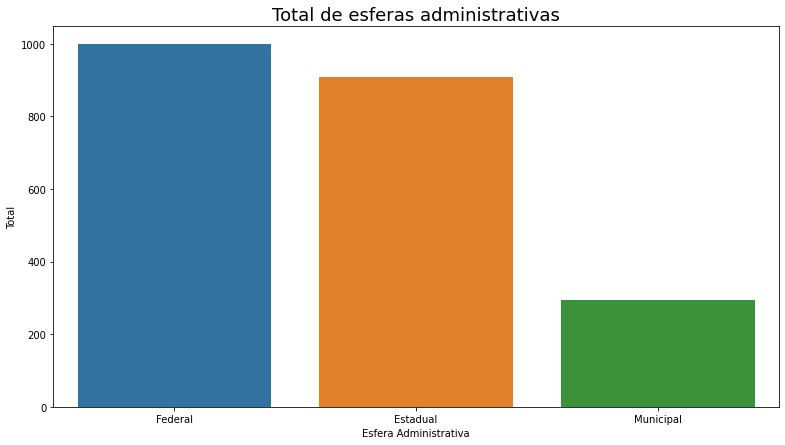

In [18]:
g = sns.countplot(x='Esfera Administrativa', data=data)
g.set_title('Total de esferas administrativas')
g.set_ylabel('Total')
plt.show()

In [19]:
# Quais são as categorias de manejo e sua quantidade?
data['Categoria de Manejo'].value_counts()

Reserva Particular do Patrimônio Natural    888
Parque                                      425
Área de Proteção Ambiental                  326
Floresta                                    106
Estação Ecológica                            98
Reserva Extrativista                         94
Reserva Biológica                            63
Refúgio de Vida Silvestre                    62
Monumento Natural                            50
Área de Relevante Interesse Ecológico        50
Reserva de Desenvolvimento Sustentável       39
Name: Categoria de Manejo, dtype: int64

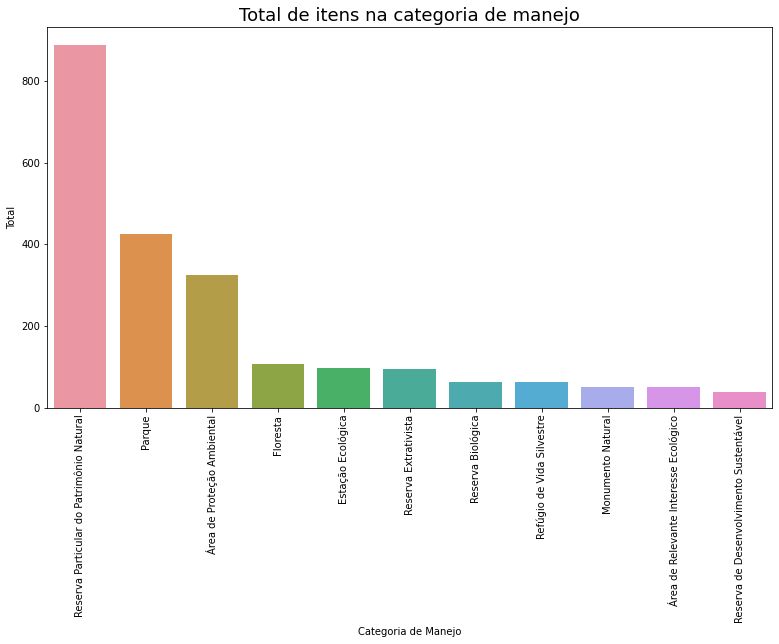

In [20]:
g = sns.countplot(x='Categoria de Manejo', data=data, 
              order = data['Categoria de Manejo'].value_counts().index)

g.set_title('Total de itens na categoria de manejo')
g.set_xticklabels(data['Categoria de Manejo'].value_counts().index, rotation=90)
g.set_ylabel('Total')

plt.show()

In [21]:
def bar_graph(x:str, data, title:str, ylabel:str, rotation:int=0):
  g = sns.countplot(x=x, data=data, 
              order = data[x].value_counts().index)

  g.set_title(title)
  g.set_xticklabels(data[x].value_counts().index, rotation=rotation)
  g.set_ylabel(ylabel)
  return g

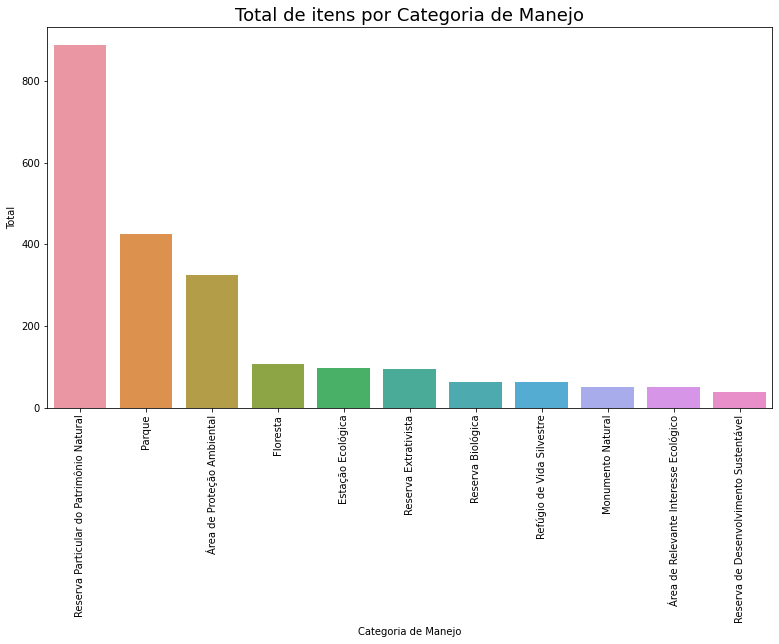

In [22]:
bar_graph('Categoria de Manejo', data, 
          'Total de itens por Categoria de Manejo', 
          'Total', rotation=90);

In [23]:
data.head()

,Nome da UC,Esfera Administrativa,Categoria de Manejo,Categoria IUCN,UF,Ano de criação,Plano de Manejo,Conselho Gestor,Área (ha),Área (ha) Amazônia,Área (ha) Caatinga,Área (ha) Cerrado,Área (ha) Mata Atlântica,Área (ha) Pampa,Área (ha) Pantanal,Área (ha) Área Marinha
0,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Não,Sim,4.437,0.0,0.000,0.000,4.320,0.0,0.0,117.0
1,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Não,Sim,143.354,0.0,4.614,138.741,0.000,0.0,0.0,0.0
2,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO DES...,Federal,Área de Proteção Ambiental,Category V,"DF, GO",1983,Não,Não,41.784,0.0,0.000,41.784,0.000,0.0,0.0,0.0
3,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Federal,Área de Proteção Ambiental,Category V,DF,1983,Não,Não,82.680,0.0,0.000,82.680,0.000,0.0,0.0,0.0
4,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Federal,Área de Proteção Ambiental,Category V,RJ,2002,Sim,Sim,150.374,0.0,0.000,0.000,150.341,0.0,0.0,32.0
